In [29]:
import html2text
import re
import pandas as pd
import spacy as sp

#pip install spacy
#python -m spacy download en

spacy_nlp = sp.load('en', disable=['parser', 'ner', 'textcat'])
spacy_stopwords = sp.lang.en.stop_words.STOP_WORDS

df = pd.read_csv('saved2017.csv', nrows=500)
body_raw = df['body']
body_prepro = []

for line in body_raw:
    line1 = re.sub(r'<a.*>', "{link}", line)
    line2 = re.sub(r'<img.*>', "{image}", line1)
    line3 = re.sub(r'<video.*>', "{video}", line2)
    line4 = html2text.html2text(line3)
    doc = spacy_nlp(line4)
    lem = ''
    for token in doc:
        if token.lemma_ not in spacy_stopwords:
            lem += token.lemma_ + ' '
    body_prepro.append(lem)
df['body_new']=body_prepro

i = 1
for line in body_prepro:
    #print(i)
    i = i + 1
    #print(line)
#print("------------------------------------------------------------------------------------------------------------")

In [ ]:
df1=df['body_new'] 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from  matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

   def fit(self, X, y=None, **fit_params):
       return self

   def transform(self, X, y=None, **fit_params):
       return X.todense()

df=pd.read_csv('saved2017.csv',nrows=500)
df2=df['pageviews']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(k=10000)

In [5]:
count_vect = CountVectorizer(kbest)
x = count_vect.fit_transform(df1)
bag_of_words = count_vect.get_feature_names()
# Creating TFIDF matrix
transformer = TfidfTransformer()
y = transformer.fit_transform(x)

In [6]:
import numpy
data = df2
bins=np.linspace(min(df2),max(df2),4)
digitized = numpy.digitize(data, bins)
clus = [data[digitized == i].mean() for i in range(1, len(bins))]
print("The bins are:",clus)
views2 = []
def categorize(l,t2):
    del t2[:]
    for num in l:
        if num <=clus[0]:
            t2.append(int(clus[0]))
        elif num <=bins[2]:
            t2.append(int(clus[1]))
        else:
            t2.append(int(clus[2]))
categorize(df2,views2)

The bins are: [12274.84693877551, 160963.75, 292751.0]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, views2, test_size = 0.20, random_state = 42)

In [8]:
scores=[]

text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()),('kbest',kbest),
                     ('clf', LogisticRegression(),)])

text_clf.fit(X_train,Y_train)
lgs_predictions = text_clf.predict(X_test)
scores.append( np.mean(lgs_predictions == Y_test))
print(' Accuracy :' , scores)

C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


 Accuracy : [0.65]


In [9]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, lgs_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.90      0.75        59
     class 1       0.67      0.29      0.41        41

   micro avg       0.65      0.65      0.65       100
   macro avg       0.66      0.60      0.58       100
weighted avg       0.65      0.65      0.61       100



In [10]:
text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()), ('kbest',kbest),
                     ('clf', SGDClassifier(loss='hinge',tol=0.1),)])

text_clf.fit(X_train,Y_train)
dt_predictions = text_clf.predict(X_test)
scores.append( np.mean(dt_predictions == Y_test))
print(scores)

[0.65, 0.67]


In [11]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, dt_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.92      0.77        59
     class 1       0.72      0.32      0.44        41

   micro avg       0.67      0.67      0.67       100
   macro avg       0.69      0.62      0.60       100
weighted avg       0.68      0.67      0.63       100



In [12]:
from sklearn.linear_model import LogisticRegressionCV

text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()),('kbest',kbest),
                     ('clf', LogisticRegressionCV(max_iter=1000),)])

text_clf.fit(X_train,Y_train)
lgscv_predictions = text_clf.predict(X_test)
scores.append( np.mean(lgscv_predictions == Y_test))
print(' Accuracy :' , scores)

C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


 Accuracy : [0.65, 0.67, 0.66]


In [13]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, lgscv_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.93      0.76        59
     class 1       0.73      0.27      0.39        41

   micro avg       0.66      0.66      0.66       100
   macro avg       0.69      0.60      0.58       100
weighted avg       0.68      0.66      0.61       100



In [14]:
from sklearn.ensemble import GradientBoostingClassifier

text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()), ('kbest',kbest),
                     ('clf', GradientBoostingClassifier(),)])

text_clf.fit(X_train,Y_train)
gbc_predictions = text_clf.predict(X_test)
scores.append( np.mean(gbc_predictions == Y_test))
print(scores)

[0.65, 0.67, 0.66, 0.69]


In [15]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, gbc_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.95      0.78        59
     class 1       0.81      0.32      0.46        41

   micro avg       0.69      0.69      0.69       100
   macro avg       0.74      0.63      0.62       100
weighted avg       0.73      0.69      0.65       100



In [16]:
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()), ('kbest',kbest),
                     ('clf', MultinomialNB(),)])

text_clf.fit(X_train,Y_train)
mnb_predictions = text_clf.predict(X_test)
scores.append( np.mean(mnb_predictions == Y_test))
print(scores)

[0.65, 0.67, 0.66, 0.69, 0.72]


In [17]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, mnb_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.95      0.80        59
     class 1       0.84      0.39      0.53        41

   micro avg       0.72      0.72      0.72       100
   macro avg       0.77      0.67      0.67       100
weighted avg       0.75      0.72      0.69       100



In [18]:
from xgboost import XGBClassifier
text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()), ('kbest',kbest),
                     ('clf', XGBClassifier(),)])
text_clf.fit(X_train,Y_train)
xgb_predictions = text_clf.predict(X_test)
scores.append( np.mean(xgb_predictions == Y_test))
print(scores)

[0.65, 0.67, 0.66, 0.69, 0.72, 0.67]


In [19]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, xgb_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.93      0.77        59
     class 1       0.75      0.29      0.42        41

   micro avg       0.67      0.67      0.67       100
   macro avg       0.70      0.61      0.60       100
weighted avg       0.69      0.67      0.63       100



In [20]:
from sklearn.ensemble import  VotingClassifier

clf1 = LogisticRegression()
clf2=XGBClassifier()
clf3=MultinomialNB()
text_clf = Pipeline([('x', CountVectorizer()), ('to_dense', DenseTransformer()),('clf', 
                                VotingClassifier(estimators=[('lr', clf1), ('xgb', clf2),('mnb',clf3)], voting='hard'),)])

text_clf.fit(X_train,Y_train)
vc_predictions = text_clf.predict(X_test)
scores.append( np.mean(vc_predictions == Y_test))
print(scores)

C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baneetkaurj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0.65, 0.67, 0.66, 0.69, 0.72, 0.67, 0.69]


In [21]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']

print(classification_report(Y_test, vc_predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.97      0.79        59
     class 1       0.86      0.29      0.44        41

   micro avg       0.69      0.69      0.69       100
   macro avg       0.76      0.63      0.61       100
weighted avg       0.74      0.69      0.64       100



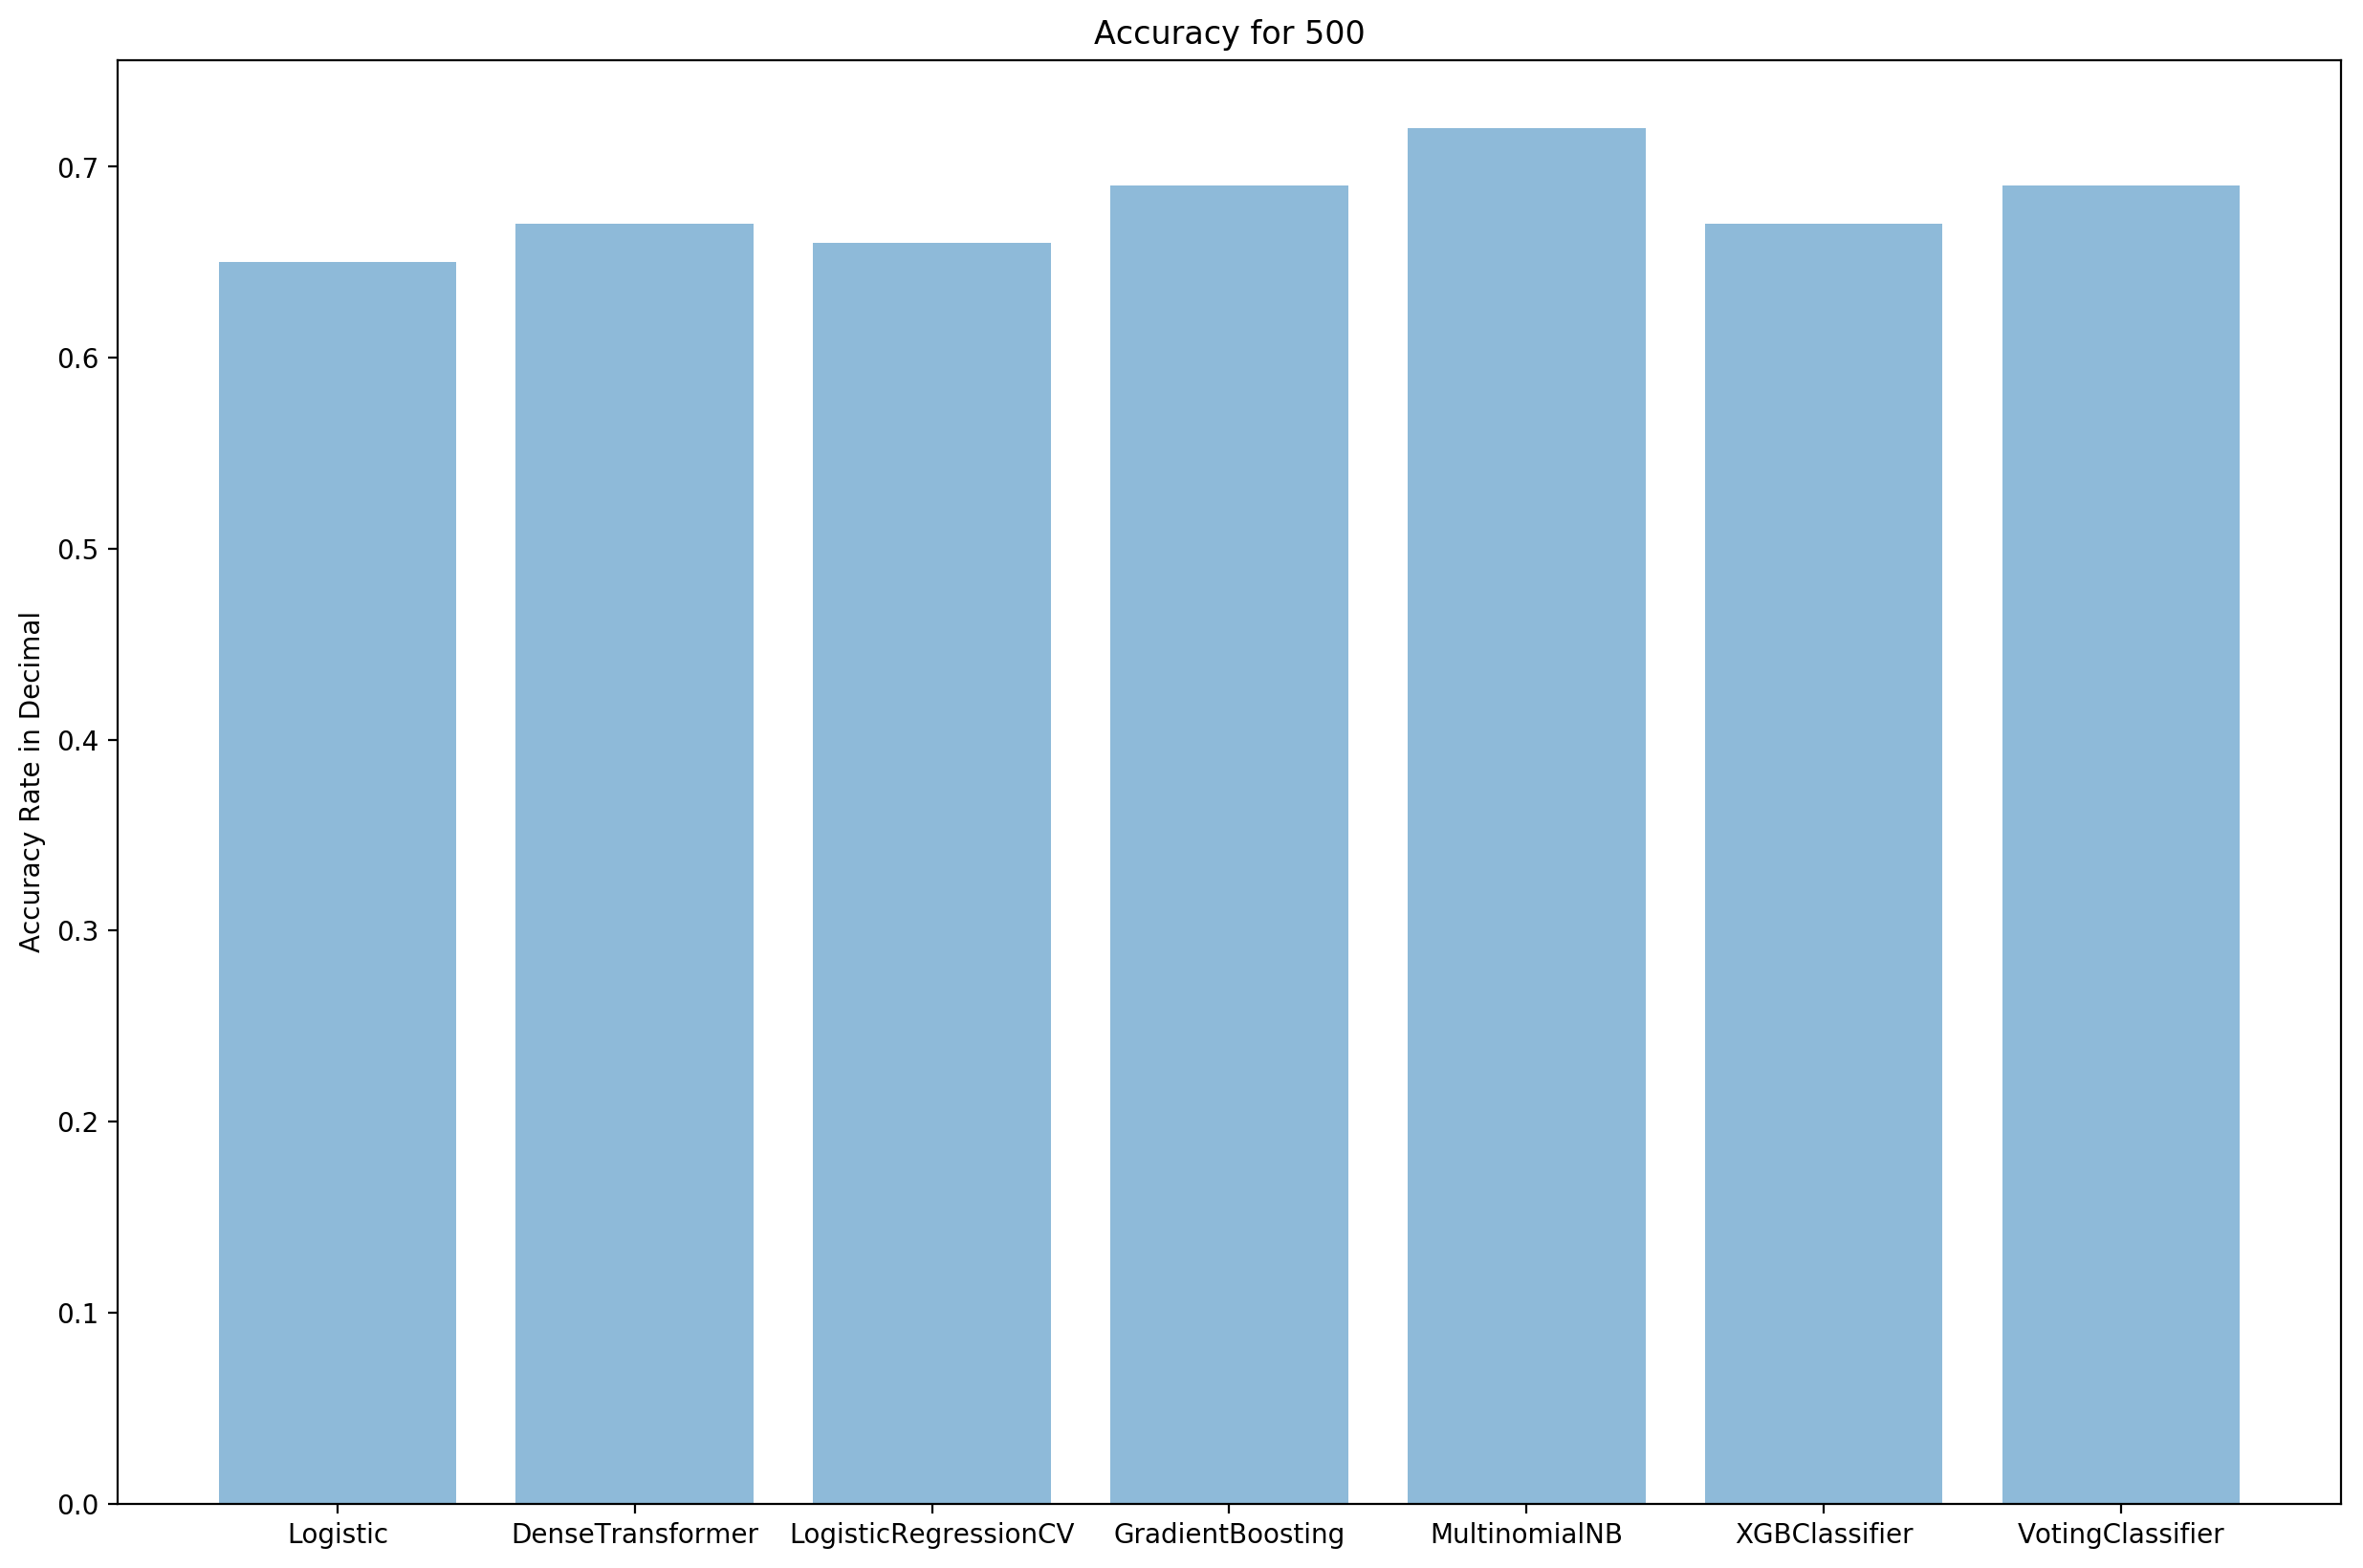

In [26]:
objects = ('Logistic','DenseTransformer','LogisticRegressionCV','GradientBoosting','MultinomialNB',
           'XGBClassifier', 'VotingClassifier')
y_pos = np.arange(len(objects))
fig=plt.figure(figsize=(15, 10), dpi= 200, facecolor='w', edgecolor='k')
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Rate in Decimal')
plt.title('Accuracy for 500')
 
plt.show()